In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_function(f,tmin,tmax,tlabel=None,xlabel=None,axes=False, **kwargs):
    ts = np.linspace(tmin,tmax,1000)
    if tlabel:
        plt.xlabel(tlabel,fontsize=18)
    if xlabel:
        plt.ylabel(xlabel,fontsize=18)
    plt.plot(ts, [f(t) for t in ts], **kwargs)
    if axes:
        total_t = tmax-tmin
        plt.plot([tmin-total_t/10,tmax+total_t/10],[0,0],c='k',linewidth=1)
        plt.xlim(tmin-total_t/10,tmax+total_t/10)
        xmin, xmax = plt.ylim()
        plt.plot([0,0],[xmin,xmax],c='k',linewidth=1)
        plt.ylim(xmin,xmax)

In [3]:
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

In [4]:
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

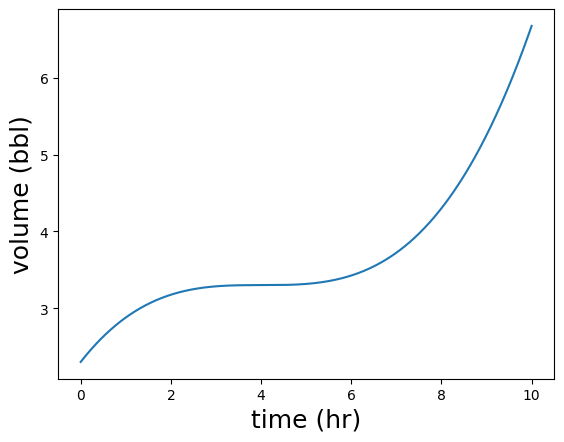

In [5]:
plot_volume(volume, 0, 10)

In [6]:
def average_flow_rate(v,t1,t2):
    return (v(t2) - v(t1))/(t2 - t1)

In [7]:
average_flow_rate(volume,4,9)

0.390625

In [8]:
def secant_line(f,x1,x2):
    #takes a function f and two values, x1 and x2, and returns a new function
    #representing a secant line over time. For example, if you ran
    #line = secant_line, then line(3) would give you the y value of the secant
    #line at x = 3.
    #y = mx + b
    slope = (f(x2) - f(x1))/(x2-x1)
    b = -slope*x1 + f(x1)
    def new_function(x):
        return (slope*x) + b
    return new_function


In [9]:
line = secant_line(volume, 4, 9)
line(9)

5.253125

In [10]:
def plot_secant(f,x1,x2, color='k'):
    line = secant_line(f,x1,x2)
    plot_function(line,x1,x2,c=color)
    plt.scatter([x1,x2],[f(x1),f(x2)],c=color)

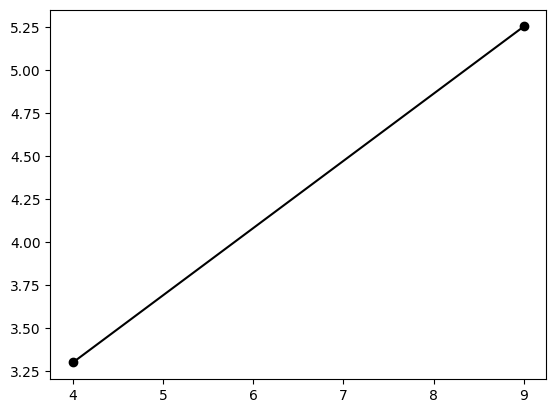

In [11]:
plot_secant(volume,4,9)

In [12]:
import numpy as np

def interval_flow_rates(v,t1,t2,dt):
    return [(t,average_flow_rate(v,t,t+dt))
            for t in np.arange(t1,t2,dt)]

In [13]:
interval_flow_rates(volume,0,10,1)

[(np.int64(0), np.float64(0.578125)),
 (np.int64(1), np.float64(0.296875)),
 (np.int64(2), np.float64(0.109375)),
 (np.int64(3), np.float64(0.015625)),
 (np.int64(4), np.float64(0.015625)),
 (np.int64(5), np.float64(0.109375)),
 (np.int64(6), np.float64(0.296875)),
 (np.int64(7), np.float64(0.578125)),
 (np.int64(8), np.float64(0.953125)),
 (np.int64(9), np.float64(1.421875))]

In [14]:
def plot_interval_flow_rates(volume,t1,t2,dt):
    series = interval_flow_rates(volume,t1,t2,dt)
    times = [t for (t,_) in series]
    rates = [q for (_,q) in series]
    plt.scatter(times,rates)

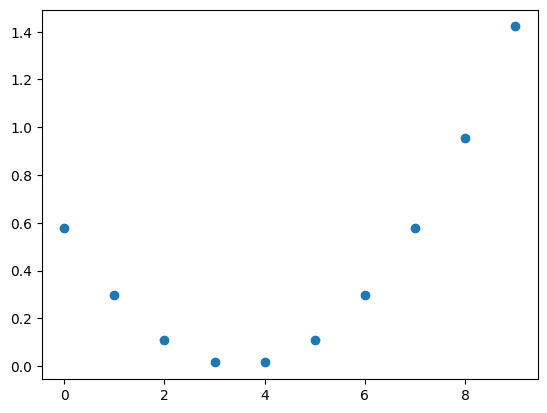

In [15]:
plot_interval_flow_rates(volume,0,10,1)

In [16]:
def instantaneous_flow_rate(v,t,digits=6):
    tolerance = 10 ** (-digits)
    h = 1
    approx = average_flow_rate(v,t-h,t+h)
    for i in range(0,2*digits):
        h = h / 10
        next_approx = average_flow_rate(v,t-h,t+h)
        if abs(next_approx-approx) < tolerance:
            return round(next_approx, digits),
        else:
            approx = next_approx
    raise Exception("Derivative did not converge")

instantaneous_flow_rate(volume,1)


(0.421875,)

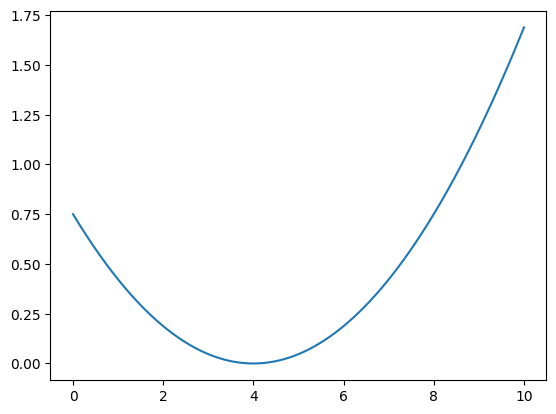

In [19]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        instantaneous_flow_rate(v,t)
    return flow_rate_function

plot_function(flow_rate,0,10)
plot_function(get_flow_rate_function(volume),0,10)